# 1. Data loading 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('MAPT.csv')

In [3]:
df.head()

,Sta_Phe,gpeMapt4c,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI,typeCI,CDR,MMSE,Group
0,E3/E3,1:omega3+IM,75,11.0,9.0,0,70,52,23.51,3.0,9.0,2.0,5-plainte mnÈsique+lenteur marche,0.0,29,Nondemented
1,E3/E3,2:omega3,85,8.0,7.0,0,58,22,25.44,1.0,10.0,1.0,1-plainte mnÈsique seule,0.5,27,Nondemented
2,E3/E3,1:omega3+IM,71,4.0,14.0,0,13,12,19.07,5.0,12.0,1.0,1-plainte mnÈsique seule,0.0,29,Nondemented
3,E2/E3,1:omega3+IM,71,9.0,9.0,1,50,10,26.73,1.0,12.0,1.0,1-plainte mnÈsique seule,0.0,30,Nondemented
4,E3/E3,3:IM,75,9.0,3.0,1,55,21,27.66,4.0,12.0,1.0,1-plainte mnÈsique seule,0.5,27,Nondemented


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sta_Phe    1122 non-null   object 
 1   gpeMapt4c  1286 non-null   object 
 2   Age        1286 non-null   int64  
 3   scCaide    1243 non-null   float64
 4   EDU        1266 non-null   float64
 5   Sex        1286 non-null   int64  
 6   VAS_M      1286 non-null   int64  
 7   VAS_I      1286 non-null   int64  
 8   BMI        1283 non-null   float64
 9   tGDS       1280 non-null   float64
 10  tSPPB      1257 non-null   float64
 11  nbCI       1282 non-null   float64
 12  typeCI     1282 non-null   object 
 13  CDR        1285 non-null   float64
 14  MMSE       1286 non-null   int64  
 15  Group      1286 non-null   object 
dtypes: float64(7), int64(5), object(4)
memory usage: 160.9+ KB


In [5]:
df.describe()

,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI,CDR,MMSE
count,1286.000000,1243.000000,1266.000000,1286.000000,1286.000000,1286.000000,1283.000000,1280.000000,1257.000000,1282.000000,1285.000000,1286.000000
mean,75.071540,7.640386,10.281201,0.348367,49.842924,39.694401,26.106555,3.092188,10.657916,1.197348,0.290661,28.173406
std,4.307212,2.025651,3.075582,0.476638,16.780020,23.231551,4.011310,2.515802,1.604855,0.460010,0.431606,1.561285
min,69.000000,4.000000,3.000000,0.000000,1.000000,0.000000,14.610000,0.000000,3.000000,1.000000,0.000000,24.000000
25%,71.000000,6.000000,9.000000,0.000000,40.000000,21.000000,23.240000,1.000000,10.000000,1.000000,0.000000,27.000000
50%,74.000000,8.000000,9.000000,0.000000,50.000000,40.500000,25.780000,3.000000,11.000000,1.000000,0.000000,28.000000
75%,78.000000,9.000000,14.000000,1.000000,61.000000,54.000000,28.410000,4.000000,12.000000,1.000000,0.500000,29.000000
max,94.000000,14.000000,15.000000,1.000000,100.000000,100.000000,43.710000,15.000000,12.000000,3.000000,4.000000,30.000000


In [6]:
df['Group'] = df['Group'].replace(['Nondemented', 'Demented'], [0,1])
df['gpeMapt4c'] = df['gpeMapt4c'].replace(['1:omega3+IM', '2:omega3', '3:IM', '4:ctrl'], [1,2,3,4])
df['Sta_Phe']=df['Sta_Phe'].replace(['E2/E2','E2/E3','E2/E4','E3/E3','E3/E4', 'E4/E4'], [0,1,2,3,4,5])
print(df.head(10))

   Sta_Phe  gpeMapt4c  Age  scCaide   EDU  Sex  VAS_M  VAS_I    BMI  tGDS  \
0      3.0          1   75     11.0   9.0    0     70     52  23.51   3.0   
1      3.0          2   85      8.0   7.0    0     58     22  25.44   1.0   
2      3.0          1   71      4.0  14.0    0     13     12  19.07   5.0   
3      1.0          1   71      9.0   9.0    1     50     10  26.73   1.0   
4      3.0          3   75      9.0   3.0    1     55     21  27.66   4.0   
5      1.0          3   77     10.0   7.0    1     68     52  26.65   5.0   
6      3.0          1   76     11.0   9.0    0     62     54  27.14   2.0   
7      3.0          1   73      9.0  12.0    0     65     55  28.84   3.0   
8      3.0          3   83      9.0  14.0    0     44     25  22.52   3.0   
9      3.0          1   71      6.0  14.0    0     45     13  22.94   3.0   

   tSPPB  nbCI                             typeCI  CDR  MMSE  Group  
0    9.0   2.0  5-plainte mnÈsique+lenteur marche  0.0    29      0  
1   10.0   1

<AxesSubplot:>

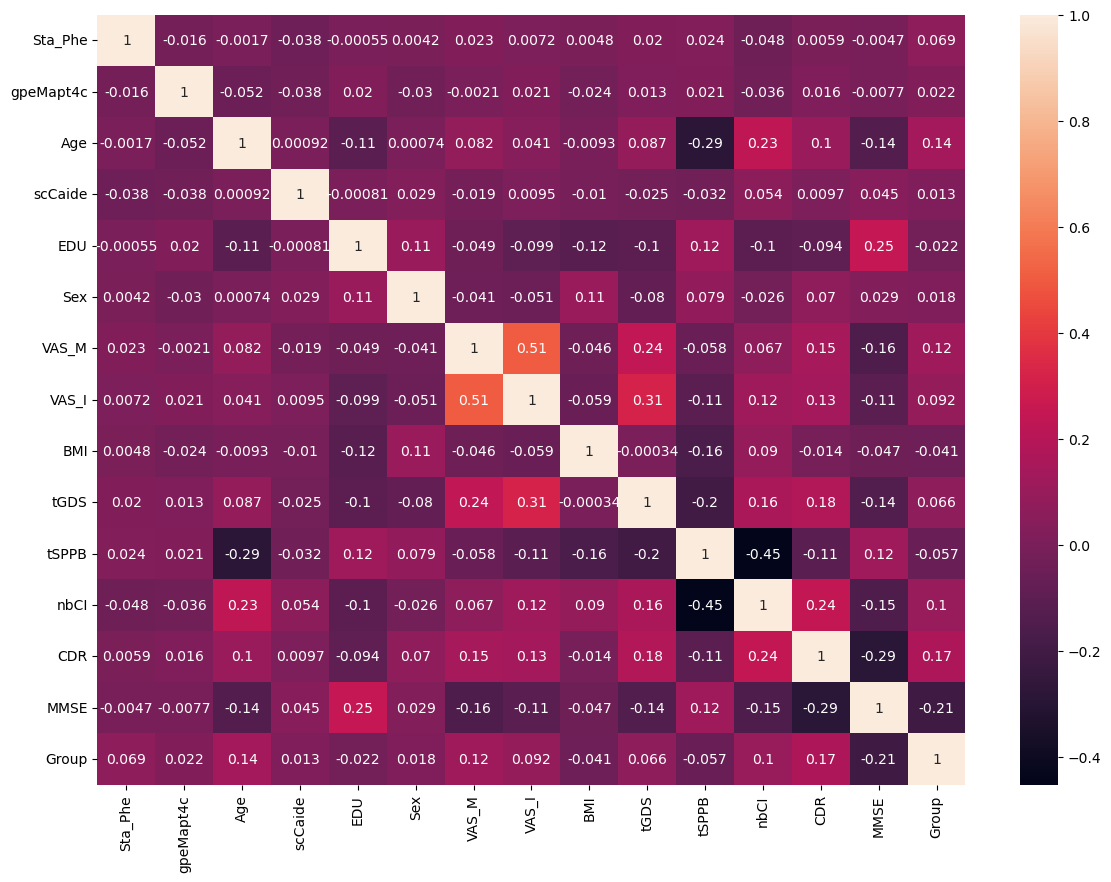

In [7]:
plt.figure(figsize = (14,10))
sns.heatmap(df[df.columns].corr(), annot=True)

# 2. Data preprocessing

**Dealing with missing values**

In [8]:
df.isnull().sum()

Sta_Phe      164
gpeMapt4c      0
Age            0
scCaide       43
EDU           20
Sex            0
VAS_M          0
VAS_I          0
BMI            3
tGDS           6
tSPPB         29
nbCI           4
typeCI         4
CDR            1
MMSE           0
Group          0
dtype: int64

In [9]:
print(df['Sta_Phe'].value_counts())
print(df['scCaide'].value_counts())
print(df['EDU'].value_counts())
print(df['BMI'].value_counts())
print(df['tGDS'].value_counts())
print(df['tSPPB'].value_counts())
print(df['nbCI'].value_counts())

3.0    738
4.0    228
1.0    124
2.0     19
5.0     11
0.0      2
Name: Sta_Phe, dtype: int64
6.0     227
7.0     223
8.0     222
9.0     195
10.0    109
4.0      93
11.0     69
5.0      65
12.0     27
13.0      9
14.0      4
Name: scCaide, dtype: int64
9.0     428
14.0    375
7.0     222
12.0    180
3.0      59
8.0       1
15.0      1
Name: EDU, dtype: int64
22.31    11
23.42     9
25.00     8
26.22     6
25.10     6
         ..
27.46     1
21.46     1
19.36     1
37.33     1
28.63     1
Name: BMI, Length: 702, dtype: int64
2.0     238
3.0     228
1.0     217
0.0     158
4.0     144
5.0      92
6.0      81
7.0      39
8.0      32
9.0      18
10.0     15
11.0      8
12.0      6
15.0      3
13.0      1
Name: tGDS, dtype: int64
12.0    516
11.0    303
10.0    179
9.0     131
8.0      62
7.0      31
6.0      21
5.0       9
4.0       4
3.0       1
Name: tSPPB, dtype: int64
1.0    1063
2.0     185
3.0      34
Name: nbCI, dtype: int64


In [10]:
# Replacing missing values highest occurance values

columns_to_fill = ['Sta_Phe', 'scCaide', 'EDU', 'BMI', 'tGDS', 'tSPPB', 'nbCI']
fill_values = [3, 6, 9, 22.31, 2, 12, 1]

for column, value in zip(columns_to_fill, fill_values):
    df[column].fillna(value, inplace=True)

In [11]:
df.isnull().sum()

Sta_Phe      0
gpeMapt4c    0
Age          0
scCaide      0
EDU          0
Sex          0
VAS_M        0
VAS_I        0
BMI          0
tGDS         0
tSPPB        0
nbCI         0
typeCI       4
CDR          1
MMSE         0
Group        0
dtype: int64

# Group by Male female and Patient condition

In [12]:
df_sub =df.groupby(['Sex','Group'])
df_sub= df_sub.agg({'MMSE':'nunique'})

In [13]:
df_sub.head()

MMSE
Sex Group      
0   0         7
    1         7
1   0         7
    1         7

In [14]:
def cat_CDR(n):
    if n <= 1:
        return 'Nondemented'
    else:
        return 'Demented'

df['CDR'] = df['CDR'].apply(cat_CDR)

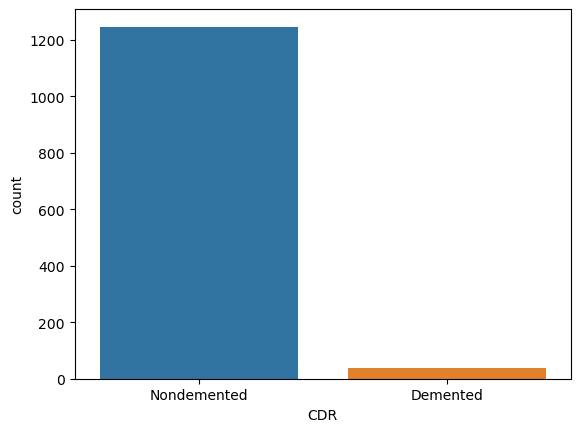

In [15]:
sns.countplot(x = 'CDR', data = df)
plt.show()

In [16]:
def cat_MMSE(n):
    if n >= 26:
        return 'Nondemented'
    else:
        return 'Demented'

df['MMSE'] = df['MMSE'].apply(cat_MMSE)

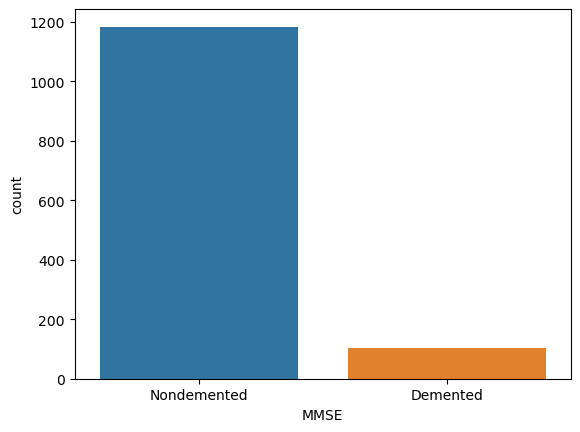

In [17]:
sns.countplot(x = 'MMSE', data = df)
plt.show()

In [18]:
df.head()

,Sta_Phe,gpeMapt4c,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI,typeCI,CDR,MMSE,Group
0,3.0,1,75,11.0,9.0,0,70,52,23.51,3.0,9.0,2.0,5-plainte mnÈsique+lenteur marche,Nondemented,Nondemented,0
1,3.0,2,85,8.0,7.0,0,58,22,25.44,1.0,10.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0
2,3.0,1,71,4.0,14.0,0,13,12,19.07,5.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0
3,1.0,1,71,9.0,9.0,1,50,10,26.73,1.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0
4,3.0,3,75,9.0,3.0,1,55,21,27.66,4.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0


In [19]:
y_data = df['Group']

In [20]:
y_data[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Group, dtype: int64

In [21]:
# Independent variable or regressor as X
# drop unrelated values
X_data = df.drop(['CDR','MMSE','Group', 'typeCI'], axis=1)
X_data.head()

,Sta_Phe,gpeMapt4c,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI
0,3.0,1,75,11.0,9.0,0,70,52,23.51,3.0,9.0,2.0
1,3.0,2,85,8.0,7.0,0,58,22,25.44,1.0,10.0,1.0
2,3.0,1,71,4.0,14.0,0,13,12,19.07,5.0,12.0,1.0
3,1.0,1,71,9.0,9.0,1,50,10,26.73,1.0,12.0,1.0
4,3.0,3,75,9.0,3.0,1,55,21,27.66,4.0,12.0,1.0


# 3. Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [41]:
X_train,X_test, y_train, y_test = train_test_split(X_data, y_data, test_size =0.33)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (861, 12) (861,)
Test set: (425, 12) (425,)


In [42]:
# Normalize Data Data Standardization give data zero mean and unit variance

X_data= preprocessing.StandardScaler().fit(X_data).transform(X_data)
X_data[0:5]

array([[ 0.02261103, -1.34611854, -0.01661573,  1.69669458, -0.41292589,
        -0.7311677 ,  1.2017219 ,  0.52989944, -0.64543163, -0.03469723,
        -1.05610763,  1.74909723],
       [ 0.02261103, -0.4533344 ,  2.30597483,  0.20595268, -1.06770109,
        -0.7311677 ,  0.48630749, -0.76195019, -0.16404512, -0.83149439,
        -0.43051831, -0.4283849 ],
       [ 0.02261103, -1.34611854, -0.94565196, -1.78170319,  1.22401212,
        -0.7311677 , -2.19649655, -1.19256673, -1.75287003,  0.76209992,
         0.82066033, -0.4283849 ],
       [-2.5058923 , -1.34611854, -0.94565196,  0.70286664, -0.41292589,
         1.3676753 ,  0.00936455, -1.27869003,  0.15771063, -0.83149439,
         0.82066033, -0.4283849 ],
       [ 0.02261103,  0.43944973, -0.01661573,  0.70286664, -2.37725149,
         1.3676753 ,  0.30745389, -0.80501184,  0.38967408,  0.36370135,
         0.82066033, -0.4283849 ]])

# 4. ML models

## 4.1. Support vector machines 

In [43]:
from sklearn import svm

In [44]:
svm_clf = svm.SVC(C=1, kernel='linear').fit(X_train, y_train)

In [45]:
ypred_svm = svm_clf.predict(X_test)

In [46]:
SVM_accuracy_score = accuracy_score(y_test,yhat_svm)*100
print("SVM_accuracy_score:", SVM_accuracy_score)

SVM_accuracy_score: 96.94117647058823


C:\Users\utente\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


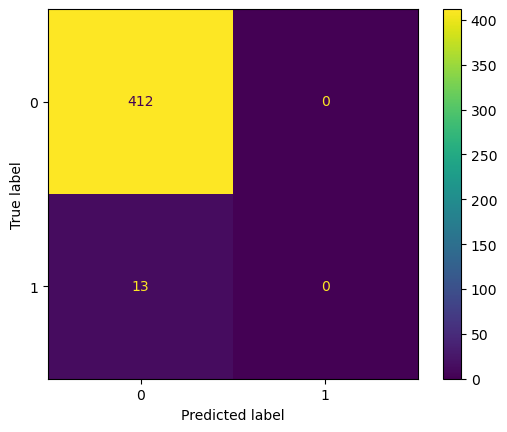

In [47]:
#confusion_matrix(y_test,yhat_svm)
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test)
plt.show()

In [48]:
print("confusion matrix\n",confusion_matrix(y_test,yhat_svm))
print("\nclassification report\n",classification_report(y_test,yhat_svm))
print("Accuracy: ",accuracy_score(y_test, yhat_svm)*100)

confusion matrix
 [[412   0]
 [ 13   0]]

classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       412
           1       0.00      0.00      0.00        13

    accuracy                           0.97       425
   macro avg       0.48      0.50      0.49       425
weighted avg       0.94      0.97      0.95       425

Accuracy:  96.94117647058823


C:\Users\utente\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utente\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utente\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# In 

the above results we can observe given model produced 97% accuracy. However 

In [50]:
# Assuming you have already trained your SVM classifier and stored it in the variable 'svm_clf'

# Select the input features from the DataFrame
input_features = df[['Sta_Phe','gpeMapt4c','Age','scCaide','EDU','Sex','VAS_M','VAS_I','BMI','tGDS','tSPPB','nbCI']]  # Replace with actual column names

# Make predictions using the trained SVM classifier
predictions = svm_clf.predict(input_features)

# Create a 'Predictions' column in the DataFrame and assign the predicted values
df['Group_Predictions'] = predictions
df['Group_Predictions'] 

C:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0       0
1       0
2       0
3       0
4       0
       ..
1281    0
1282    0
1283    0
1284    0
1285    0
Name: Group_Predictions, Length: 1286, dtype: int64

In [51]:
df['Group_Predictions'] 

0       0
1       0
2       0
3       0
4       0
       ..
1281    0
1282    0
1283    0
1284    0
1285    0
Name: Group_Predictions, Length: 1286, dtype: int64

In [52]:
print(df['Group_Predictions'])

0       0
1       0
2       0
3       0
4       0
       ..
1281    0
1282    0
1283    0
1284    0
1285    0
Name: Group_Predictions, Length: 1286, dtype: int64


In [53]:
result = pd.concat([df, df['Group_Predictions']], axis=0)

In [54]:
result.head()

,Sta_Phe,gpeMapt4c,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI,typeCI,CDR,MMSE,Group,Group_Predictions,0
0,3.0,1.0,75.0,11.0,9.0,0.0,70.0,52.0,23.51,3.0,9.0,2.0,5-plainte mnÈsique+lenteur marche,Nondemented,Nondemented,0.0,0.0,NaN
1,3.0,2.0,85.0,8.0,7.0,0.0,58.0,22.0,25.44,1.0,10.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0.0,0.0,NaN
2,3.0,1.0,71.0,4.0,14.0,0.0,13.0,12.0,19.07,5.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0.0,0.0,NaN
3,1.0,1.0,71.0,9.0,9.0,1.0,50.0,10.0,26.73,1.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0.0,0.0,NaN
4,3.0,3.0,75.0,9.0,3.0,1.0,55.0,21.0,27.66,4.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0.0,0.0,NaN


In [55]:
df.to_csv('result.csv',index=False) # save to notebook output
df.head(10)

,Sta_Phe,gpeMapt4c,Age,scCaide,EDU,Sex,VAS_M,VAS_I,BMI,tGDS,tSPPB,nbCI,typeCI,CDR,MMSE,Group,Group_Predictions
0,3.0,1,75,11.0,9.0,0,70,52,23.51,3.0,9.0,2.0,5-plainte mnÈsique+lenteur marche,Nondemented,Nondemented,0,0
1,3.0,2,85,8.0,7.0,0,58,22,25.44,1.0,10.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
2,3.0,1,71,4.0,14.0,0,13,12,19.07,5.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
3,1.0,1,71,9.0,9.0,1,50,10,26.73,1.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
4,3.0,3,75,9.0,3.0,1,55,21,27.66,4.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
5,1.0,3,77,10.0,7.0,1,68,52,26.65,5.0,6.0,2.0,5-plainte mnÈsique+lenteur marche,Nondemented,Nondemented,0,0
6,3.0,1,76,11.0,9.0,0,62,54,27.14,2.0,8.0,2.0,5-plainte mnÈsique+lenteur marche,Nondemented,Nondemented,0,0
7,3.0,1,73,9.0,12.0,0,65,55,28.84,3.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
8,3.0,3,83,9.0,14.0,0,44,25,22.52,3.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
9,3.0,1,71,6.0,14.0,0,45,13,22.94,3.0,12.0,1.0,1-plainte mnÈsique seule,Nondemented,Nondemented,0,0
